<a href="https://colab.research.google.com/github/gstenger23/dsci352/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# linking to drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        17:38:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


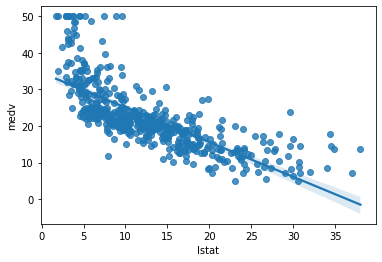

In [4]:
# You will need to change this for your environment
DATA_ROOT = 'drive/MyDrive/Colab Notebooks/ALL CSV FILES - 2nd Edition/'
df = pd.read_csv(DATA_ROOT + 'Boston.csv', index_col=0)
df.head()

# We will use the Boston house data from the text book in part of this lab. Here is a regression
# of median house price against proportion of residents in a neighborhood in a lower economic demographic.
lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()

print(result.summary())

sns.regplot('lstat', 'medv', df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


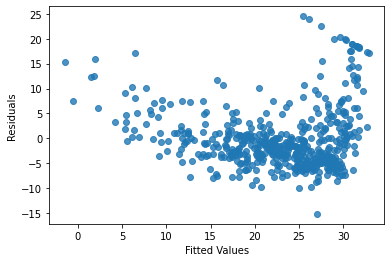

In [5]:
# Plot residuals against fitted values
# You can get the fitted values and the residuals as properties of the regression, among other properties

fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)
plt.show()

# Multiple Linear Regression

In [8]:

# Add one other feature to compare the regression fit
m1 = sm.OLS.from_formula('medv ~ lstat + age', df)
r1 = m1.fit()
print(r1.summary())

# We can use an ANOVA to test the null hypothesis that the regression using the squared term
# does not improve the fit. For example, this ANOVA shows an F score of 135
# and a p-value of virtually zero, indicating an improved fit
print(sm.stats.anova_lm(result, r1))

# The anova table shows F statistics and p-values for the null hypotheses that the
# model with age as well as lstat fits the data as well as the first model, which
# can be rejected with a p-value of 0.005



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.98e-88
Time:                        17:48:57   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [9]:
# Add all the other features:
# This syntax lets us easily reference all the other columns save
m2 = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
r2 = m2.fit()
print(r2.summary())

print(sm.stats.anova_lm(r1, r2))

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.23e-133
Time:                        17:49:02   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

# Questions 1-3

Question 1: can we reject the null hypothesis that the model for median value (medv)
with all the fields fits the data no better than the model with only lstat and age? Why?

We can reject the null hypothesis that the model for medv with all the fields fits the data no better than the model with only lstat and age because the r-squared is larger and the f-stat is smaller for the model with all the fields which means it better fits the data.

Question 2: from the result of the second regression, which predictor variables would you
drop from the regression? 

I would drop age and indus because their high p values indicate that they aren't statistically significant.



In [11]:
print(sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'age', 'indus'])), df).fit().summary())

# Insert your own model here or edit above

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.73e-135
Time:                        18:59:17   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.0

Question 3: After you drop these variables, what is the R-squared and how does it compare to the
full R-squared and that of the model with lstat and age?


After you drop age and industry, the R-squared increases. It is approximately the same as the R-squared of the regression with all of the variables because we are simply removing the less correlated variables and it is larger than the R-squared of the model with lstat and age because it has more predictive variables than the original model. 


# Interaction terms


In [10]:
# You can include interaction terms in the regression formula with a '*'. For example,
# this regression includes lstat * age, and automatically includes both lstat and age.
print(sm.OLS.from_formula('medv ~ lstat*age', df).fit().summary())



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.86e-88
Time:                        18:38:27   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

# Question 4

Question 4: Based on the regression graph of medv regressed onto lstat in the second cell, above, would
you expect that including a squared term for lstat might be useful for the model? Why?

Yes, I would expect that including a squared term for lstat would make the model better predictive because the dataset isn't perfectly linear the squared term better encapsulates more of the data. This was shown to be true with the increase in the R-squared from .544 to .641.

In [12]:
# You can also include functions of predictor variables. For example, this version
# includes a squared term for lstat
lm.fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', df).fit()
print(lm.fit2.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.56e-112
Time:                        19:26:01   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

In [ ]:
print(sm.stats.anova_lm(result, lm.fit2))


# Qualitative variables


In [15]:
# We turn now to a new data set from the text book, on number of car seats sold,
# which includes three qualitative variables.
# Recall you may need to modify this line to load the data on your setup:

df2 = pd.read_csv(DATA_ROOT + 'Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [16]:
# The regression defined with the from_formula call automatically converts the
# three categorical variables to dummy variables.

print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales'])), df2).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.60e-166
Time:                        19:41:35   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

# Question 5

Question 5: Why are there two variables for Shelving location included in the
regression? Which variables would you consider dropping from this regression?

There are two variables because it is categorical data with 3 labels which can be caputured by two one-hot encoded sections. Adding a third variable isn't necessary because there are two degrees of freedom with the shelving data.

I would consider dropping US, Urban, Education, and Population because their P values are too large to likely be statistically significant.


In [19]:
# You can show the result of dropping the variables you suggest here (not scored)

print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales', 'US','Urban','Education','Population'])), df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.25e-170
Time:                        20:04:21   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4752    